In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

In [2]:
path = "weather_data.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101682 entries, 0 to 101681
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  101682 non-null  object 
 1   region                95226 non-null   object 
 2   country               101682 non-null  object 
 3   lat                   101682 non-null  float64
 4   lon                   101682 non-null  float64
 5   date                  101682 non-null  object 
 6   date_epoch            101682 non-null  int64  
 7   maxtemp_c             101682 non-null  float64
 8   maxtemp_f             101682 non-null  float64
 9   mintemp_c             101682 non-null  float64
 10  mintemp_f             101682 non-null  float64
 11  avgtemp_c             101682 non-null  float64
 12  avgtemp_f             101682 non-null  float64
 13  maxwind_mph           101682 non-null  float64
 14  maxwind_kph           101682 non-null  float64
 15  

In [5]:
df.loc[(df['city'] == 'Yen Hung') & (df['region'].isna()), 'region'] = 'Quảng Ninh'
df.loc[(df['city'] == 'Phan Rang- Thap Cham') & (df['region'].isna()), 'region'] = 'Ninh Thuận'
df.loc[(df['city'] == 'Dong Ha Dong') & (df['region'].isna()), 'region'] = 'Quảng Trị'
df.drop(df[df['city'] == 'Humera Airport'].index, inplace=True)

In [6]:
name_mapping = {
    'Đà Nẵng': 'TP. Đà Nẵng',
    'Hải Phòng': 'TP. Hải Phòng',
    'Hà Nội': 'TP. Hà Nội',
    'Cần Thơ': 'TP. Cần Thơ',
    'Hồ Chí Minh': 'TP. Hồ Chí Minh',
}
df['region'] = df['region'].replace(name_mapping)

In [7]:
df['region'].unique()

array(['An Giang', 'Bà Rịa-Vũng Tàu', 'Bắc Giang', 'Bắc Kạn', 'Bạc Liêu',
       'Bắc Ninh', 'Bến Tre', 'Bình Định', 'Bình Dương', 'Bình Phước',
       'Bình Thuận', 'Cà Mau', 'TP. Cần Thơ', 'Cao Bằng', 'TP. Đà Nẵng',
       'Đắk Lắk', 'Đắk Nông', 'Điện Biên', 'Đồng Nai', 'Đồng Tháp',
       'Gia Lai', 'Hà Giang', 'Hà Nam', 'TP. Hà Nội', 'Hà Tĩnh',
       'Hải Dương', 'TP. Hải Phòng', 'Hậu Giang', 'TP. Hồ Chí Minh',
       'Hòa Bình', 'Quảng Ninh', 'Khánh Hòa', 'Kiên Giang', 'Kon Tum',
       'Lai Châu', 'Lâm Đồng', 'Lạng Sơn', 'Lào Cai', 'Long An',
       'Nam Định', 'Nghệ An', 'Ninh Bình', 'Ninh Thuận', 'Phú Thọ',
       'Phú Yên', 'Quảng Bình', 'Quảng Nam', 'Quảng Ngãi', 'Quảng Trị',
       'Sóc Trăng', 'Sơn La', 'Tây Ninh', 'Thái Bình', 'Thái Nguyên',
       'Thanh Hóa', 'Tiền Giang', 'Trà Vinh', 'Tuyên Quang', 'Vĩnh Long',
       'Vĩnh Phúc', 'Yên Bái'], dtype=object)

In [8]:
map_provinces_region = {
  "TP. Hà Nội": "Đồng bằng sông Hồng",
  "Vĩnh Phúc": "Đồng bằng sông Hồng",
  "Bắc Ninh": "Đồng bằng sông Hồng",
  "Quảng Ninh": "Đồng bằng sông Hồng",
  "Hải Dương": "Đồng bằng sông Hồng",
  "TP. Hải Phòng": "Đồng bằng sông Hồng",
  "Hưng Yên": "Đồng bằng sông Hồng",
  "Thái Bình": "Đồng bằng sông Hồng",
  "Hà Nam": "Đồng bằng sông Hồng",
  "Nam Định": "Đồng bằng sông Hồng",
  "Ninh Bình": "Đồng bằng sông Hồng",

  "Hà Giang": "Trung du và miền núi Bắc Bộ",
  "Cao Bằng": "Trung du và miền núi Bắc Bộ",
  "Bắc Kạn": "Trung du và miền núi Bắc Bộ",
  "Tuyên Quang": "Trung du và miền núi Bắc Bộ",
  "Lào Cai": "Trung du và miền núi Bắc Bộ",
  "Yên Bái": "Trung du và miền núi Bắc Bộ",
  "Thái Nguyên": "Trung du và miền núi Bắc Bộ",
  "Lạng Sơn": "Trung du và miền núi Bắc Bộ",
  "Bắc Giang": "Trung du và miền núi Bắc Bộ",
  "Phú Thọ": "Trung du và miền núi Bắc Bộ",
  "Điện Biên": "Trung du và miền núi Bắc Bộ",
  "Lai Châu": "Trung du và miền núi Bắc Bộ",
  "Sơn La": "Trung du và miền núi Bắc Bộ",
  "Hòa Bình": "Trung du và miền núi Bắc Bộ",

  "Thanh Hóa": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Nghệ An": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Hà Tĩnh": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Quảng Bình": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Quảng Trị": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Thừa Thiên Huế": "Bắc Trung Bộ và Duyên hải miền Trung",
  "TP. Đà Nẵng": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Quảng Nam": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Quảng Ngãi": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Bình Định": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Phú Yên": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Khánh Hòa": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Ninh Thuận": "Bắc Trung Bộ và Duyên hải miền Trung",
  "Bình Thuận": "Bắc Trung Bộ và Duyên hải miền Trung",
  
  "Kon Tum": "Tây Nguyên",
  "Gia Lai": "Tây Nguyên",
  "Đắk Lắk": "Tây Nguyên",
  "Đắk Nông": "Tây Nguyên",
  "Lâm Đồng": "Tây Nguyên",

  "Bình Phước": "Đông Nam Bộ",
  "Tây Ninh": "Đông Nam Bộ",
  "Bình Dương": "Đông Nam Bộ",
  "Đồng Nai": "Đông Nam Bộ",
  "Bà Rịa-Vũng Tàu": "Đông Nam Bộ",
  "TP. Hồ Chí Minh": "Đông Nam Bộ",

  "Long An": "Đồng bằng sông Cửu Long",
  "Tiền Giang": "Đồng bằng sông Cửu Long",
  "Bến Tre": "Đồng bằng sông Cửu Long",
  "Trà Vinh": "Đồng bằng sông Cửu Long",
  "Vĩnh Long": "Đồng bằng sông Cửu Long",
  "Đồng Tháp": "Đồng bằng sông Cửu Long",
  "An Giang": "Đồng bằng sông Cửu Long",
  "Kiên Giang": "Đồng bằng sông Cửu Long",
  "TP. Cần Thơ": "Đồng bằng sông Cửu Long",
  "Hậu Giang": "Đồng bằng sông Cửu Long",
  "Sóc Trăng": "Đồng bằng sông Cửu Long",
  "Bạc Liêu": "Đồng bằng sông Cửu Long",
  "Cà Mau": "Đồng bằng sông Cửu Long"
  
}

In [9]:
df['region_2'] = df['region'].map(map_provinces_region)

In [10]:
map_terrain = {
  "An Giang": "đồng bằng",
  "Bà Rịa-Vũng Tàu": "ven biển",
  "Bắc Giang": "miền núi",
  "Bắc Kạn": "miền núi",
  "Bạc Liêu": "ven biển",
  "Bắc Ninh": "đồng bằng",
  "Bến Tre": "ven biển",
  "Bình Định": "ven biển",
  "Bình Dương": "đồng bằng",
  "Bình Phước": "miền núi",
  "Bình Thuận": "ven biển",
  "Cà Mau": "ven biển",
  "TP. Cần Thơ": "đồng bằng",
  "Cao Bằng": "miền núi",
  "TP. Đà Nẵng": "ven biển",
  "Đắk Lắk": "miền núi",
  "Đắk Nông": "miền núi",
  "Điện Biên": "miền núi",
  "Đồng Nai": "đồng bằng",
  "Đồng Tháp": "đồng bằng",
  "Gia Lai": "miền núi",
  "Hà Giang": "miền núi",
  "Hà Nam": "đồng bằng",
  "TP. Hà Nội": "đồng bằng",
  "Hà Tĩnh": "ven biển",
  "Hải Dương": "đồng bằng",
  "TP. Hải Phòng": "ven biển",
  "Hậu Giang": "đồng bằng",
  "TP. Hồ Chí Minh": "đồng bằng",
  "Hòa Bình": "miền núi",
  "Hưng Yên": "đồng bằng",
  "Khánh Hòa": "ven biển",
  "Kiên Giang": "ven biển",
  "Kon Tum": "miền núi",
  "Lai Châu": "miền núi",
  "Lâm Đồng": "miền núi",
  "Lạng Sơn": "miền núi",
  "Lào Cai": "miền núi",
  "Long An": "đồng bằng",
  "Nam Định": "ven biển",
  "Nghệ An": "ven biển",
  "Ninh Bình": "đồng bằng",
  "Ninh Thuận": "ven biển",
  "Phú Thọ": "miền núi",
  "Phú Yên": "ven biển",
  "Quảng Bình": "ven biển",
  "Quảng Nam": "ven biển",
  "Quảng Ngãi": "ven biển",
  "Quảng Ninh": "ven biển",
  "Quảng Trị": "ven biển",
  "Sóc Trăng": "ven biển",
  "Sơn La": "miền núi",
  "Tây Ninh": "đồng bằng",
  "Thái Bình": "ven biển",
  "Thái Nguyên": "miền núi",
  "Thanh Hóa": "ven biển",
  "Thừa Thiên - Huế": "ven biển",
  "Tiền Giang": "ven biển",
  "Trà Vinh": "ven biển",
  "Tuyên Quang": "miền núi",
  "Vĩnh Long": "đồng bằng",
  "Vĩnh Phúc": "đồng bằng",
  "Yên Bái": "miền núi"
}

In [11]:
df['terrain'] = df['region'].map(map_terrain)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100068 entries, 0 to 101681
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  100068 non-null  object 
 1   region                100068 non-null  object 
 2   country               100068 non-null  object 
 3   lat                   100068 non-null  float64
 4   lon                   100068 non-null  float64
 5   date                  100068 non-null  object 
 6   date_epoch            100068 non-null  int64  
 7   maxtemp_c             100068 non-null  float64
 8   maxtemp_f             100068 non-null  float64
 9   mintemp_c             100068 non-null  float64
 10  mintemp_f             100068 non-null  float64
 11  avgtemp_c             100068 non-null  float64
 12  avgtemp_f             100068 non-null  float64
 13  maxwind_mph           100068 non-null  float64
 14  maxwind_kph           100068 non-null  float64
 15  total

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['sunrise_dt'] = pd.to_datetime(df['sunrise'], format='%I:%M %p')
df['sunset_dt'] = pd.to_datetime(df['sunset'], format='%I:%M %p')

In [14]:
df.to_csv('weather_data_processed.csv', index=False)

In [14]:
df_v2 = df[['city', 'region', 'region_2', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter', 'maxtemp_c', 'mintemp_c', 'avgtemp_c', 'maxwind_kph', 'totalprecip_mm', 'totalsnow_cm', 'avgvis_km', 'avghumidity', 'uv_mean', 'sunrise_dt', 'sunset_dt']].copy()

In [15]:
df_v2.columns = ['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter', 'maxtemp_c', 'mintemp_c', 'avgtemp_c', 'maxwind_kph', 'totalprecip_mm', 'totalsnow_cm', 'avgvis_km', 'avghumidity', 'uv_mean', 'sunrise', 'sunset']

In [16]:
df_ranking = df_v2[['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter']].copy()

## Nhiệt độ, lượng mưa thay đổi như thế nào theo từng tháng tại một địa điểm cụ thể?

In [17]:
name_data = df_v2[df_v2['province'] == 'TP. Hà Nội']
name_data = name_data.sort_values(by='date', ascending=True).copy()
mounth_data = name_data.groupby('month').agg(
  max_temp = ('maxtemp_c', 'max'),
  min_temp = ('mintemp_c', 'min'),
  avg_temp = ('avgtemp_c', 'mean'),

  max_totalprecip_mm = ('totalprecip_mm', 'max'),
  min_totalprecip_mm = ('totalprecip_mm', 'min'),
  avg_totalprecip_mm = ('totalprecip_mm', 'mean'),  
).reset_index()

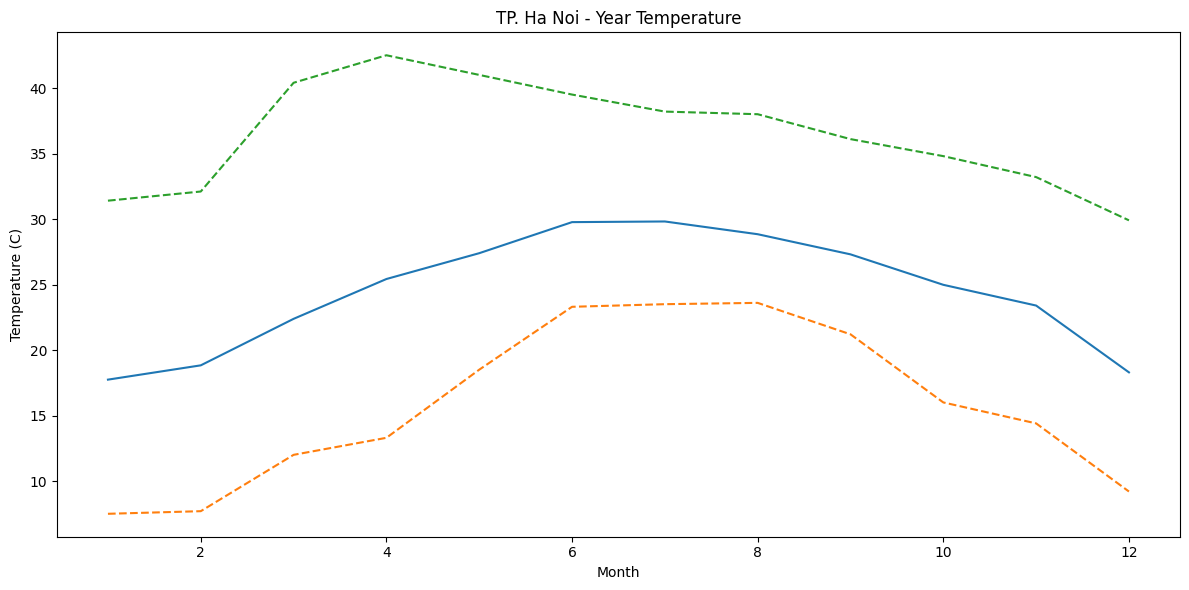

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_temp'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_temp'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_temp'], linestyle='--')
plt.title('TP. Ha Noi - Year Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

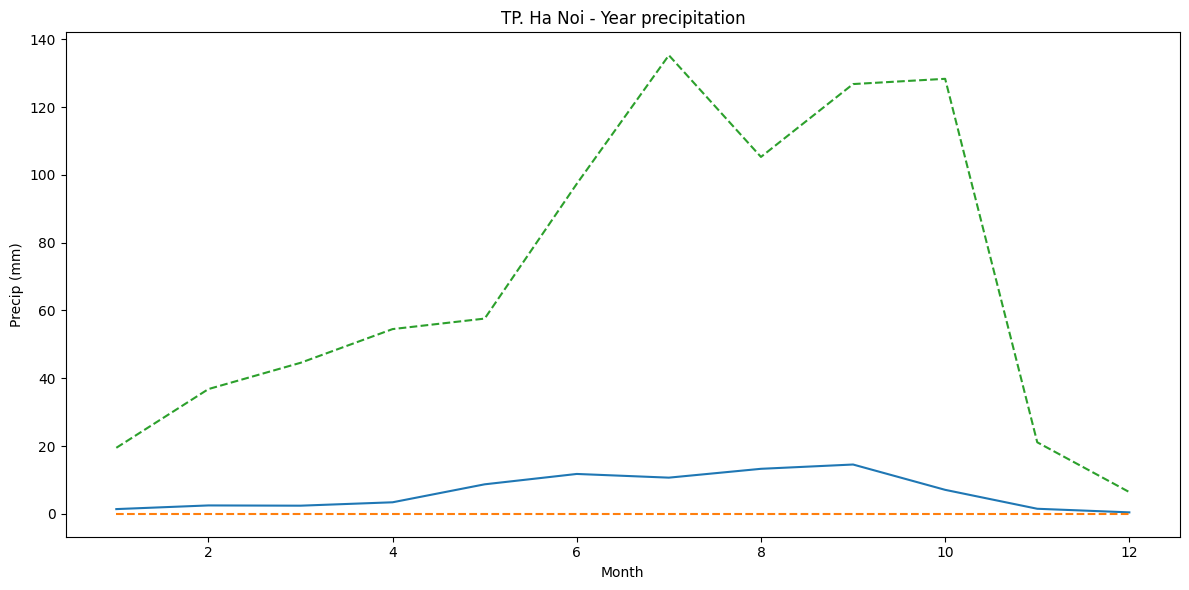

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_totalprecip_mm'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_totalprecip_mm'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_totalprecip_mm'], linestyle='--')
plt.title('TP. Ha Noi - Year precipitation')
plt.xlabel('Month')
plt.ylabel('Precip (mm)')
plt.tight_layout()
plt.show()

In [20]:
name_data = df_v2[df_v2['province'] == 'TP. Đà Nẵng']
name_data = name_data.sort_values(by='date', ascending=True).copy()
mounth_data = name_data.groupby('month').agg(
  max_temp = ('maxtemp_c', 'max'),
  min_temp = ('mintemp_c', 'min'),
  avg_temp = ('avgtemp_c', 'mean'),

  max_totalprecip_mm = ('totalprecip_mm', 'max'),
  min_totalprecip_mm = ('totalprecip_mm', 'min'),
  avg_totalprecip_mm = ('totalprecip_mm', 'mean'),  
).reset_index()

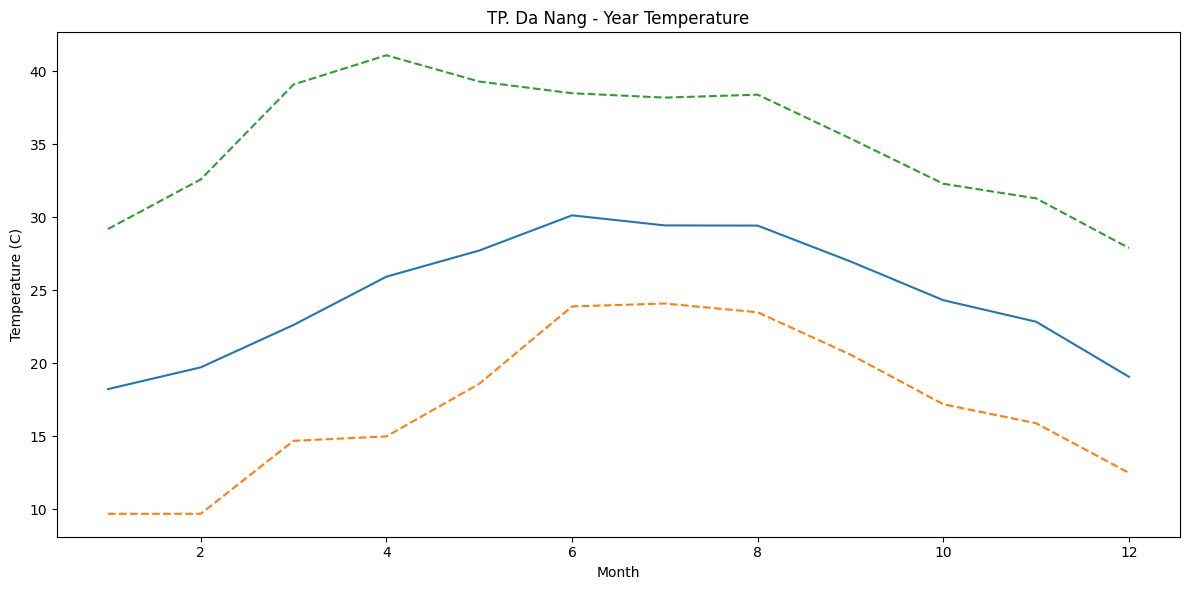

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_temp'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_temp'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_temp'], linestyle='--')
plt.title('TP. Da Nang - Year Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

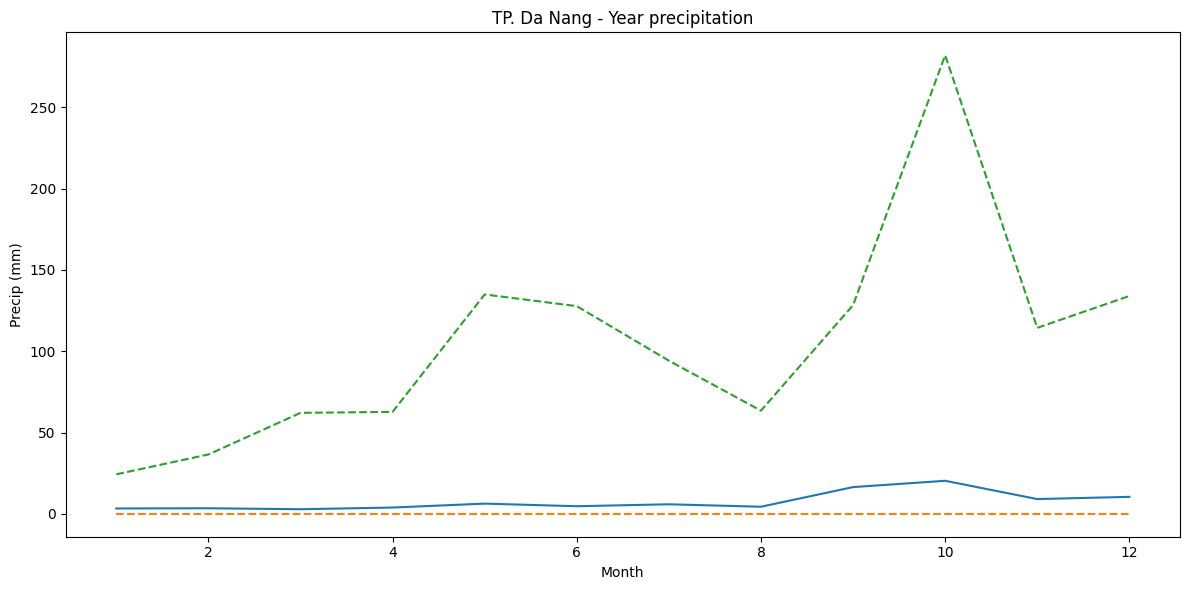

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_totalprecip_mm'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_totalprecip_mm'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_totalprecip_mm'], linestyle='--')
plt.title('TP. Da Nang - Year precipitation')
plt.xlabel('Month')
plt.ylabel('Precip (mm)')
plt.tight_layout()
plt.show()

In [23]:
name_data = df_v2[df_v2['province'] == 'TP. Hồ Chí Minh']
name_data = name_data.sort_values(by='date', ascending=True).copy()
mounth_data = name_data.groupby('month').agg(
  max_temp = ('maxtemp_c', 'max'),
  min_temp = ('mintemp_c', 'min'),
  avg_temp = ('avgtemp_c', 'mean'),

  max_totalprecip_mm = ('totalprecip_mm', 'max'),
  min_totalprecip_mm = ('totalprecip_mm', 'min'),
  avg_totalprecip_mm = ('totalprecip_mm', 'mean'),  
).reset_index()

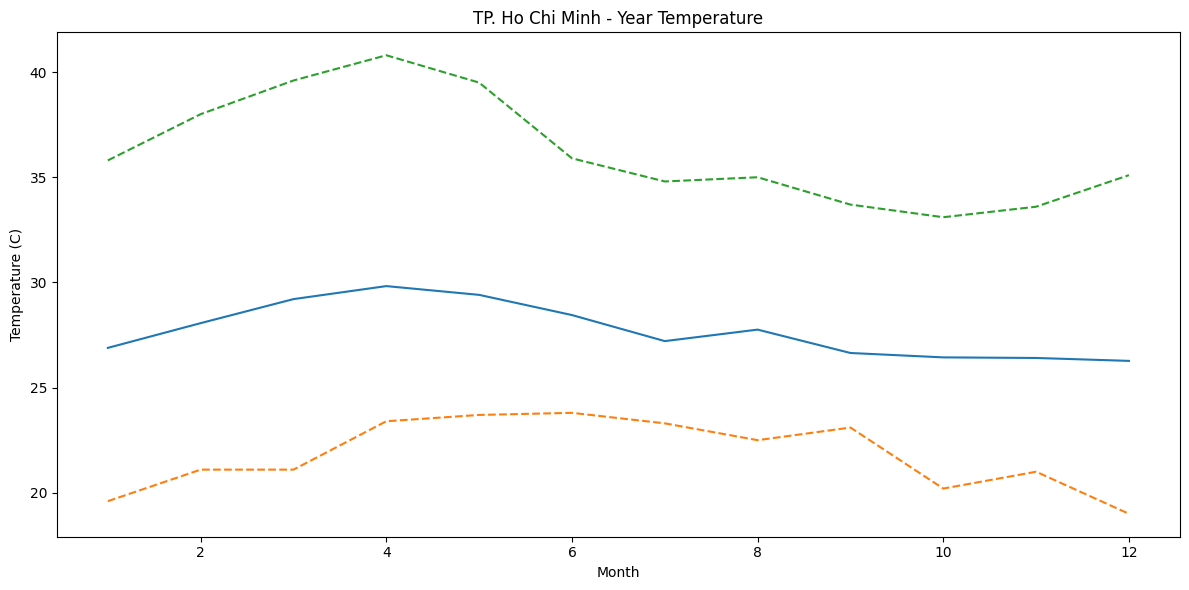

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_temp'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_temp'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_temp'], linestyle='--')
plt.title('TP. Ho Chi Minh - Year Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.tight_layout()
plt.show()

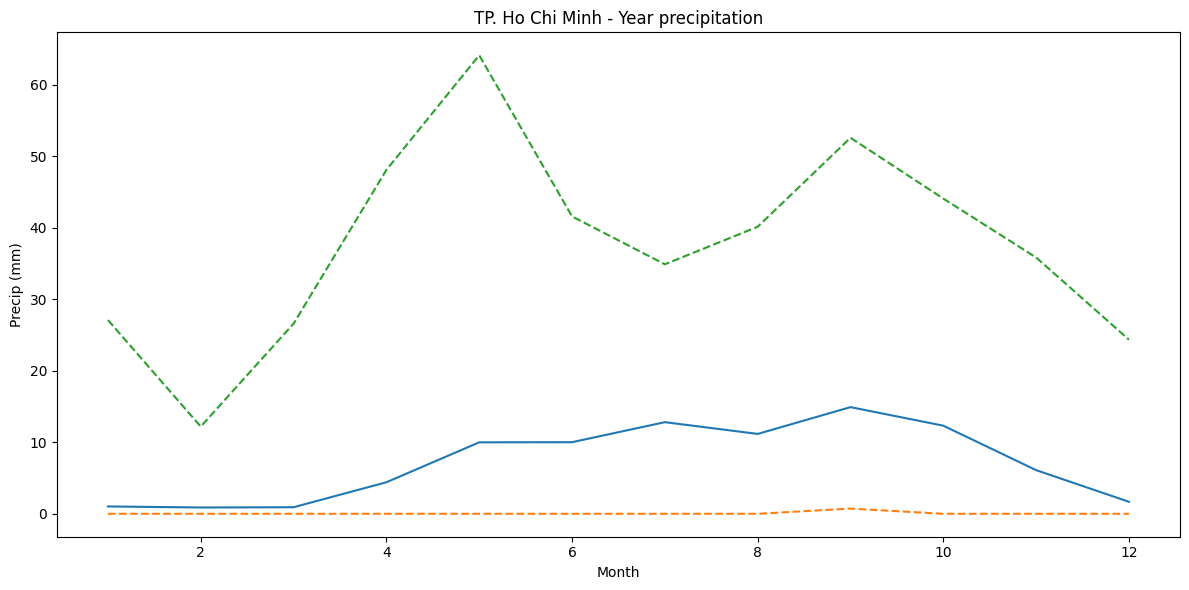

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(mounth_data['month'], mounth_data['avg_totalprecip_mm'], linestyle='-')
plt.plot(mounth_data['month'], mounth_data['min_totalprecip_mm'], linestyle='--')
plt.plot(mounth_data['month'], mounth_data['max_totalprecip_mm'], linestyle='--')
plt.title('TP. Ho Chi Minh - Year precipitation')
plt.xlabel('Month')
plt.ylabel('Precip (mm)')
plt.tight_layout()
plt.show()

## Phân bố nhiệt độ trung bình như thế nào theo từng khu vực và theo mùa (xuân, hạ, thu, đông)?

In [26]:
temp_data = df_v2[['region', 'month', 'quarter', 'date', 'avgtemp_c']].copy()
temp_mean = temp_data.groupby(['region', 'quarter']).agg(
  mean_temp=('avgtemp_c', 'mean'),
).reset_index()

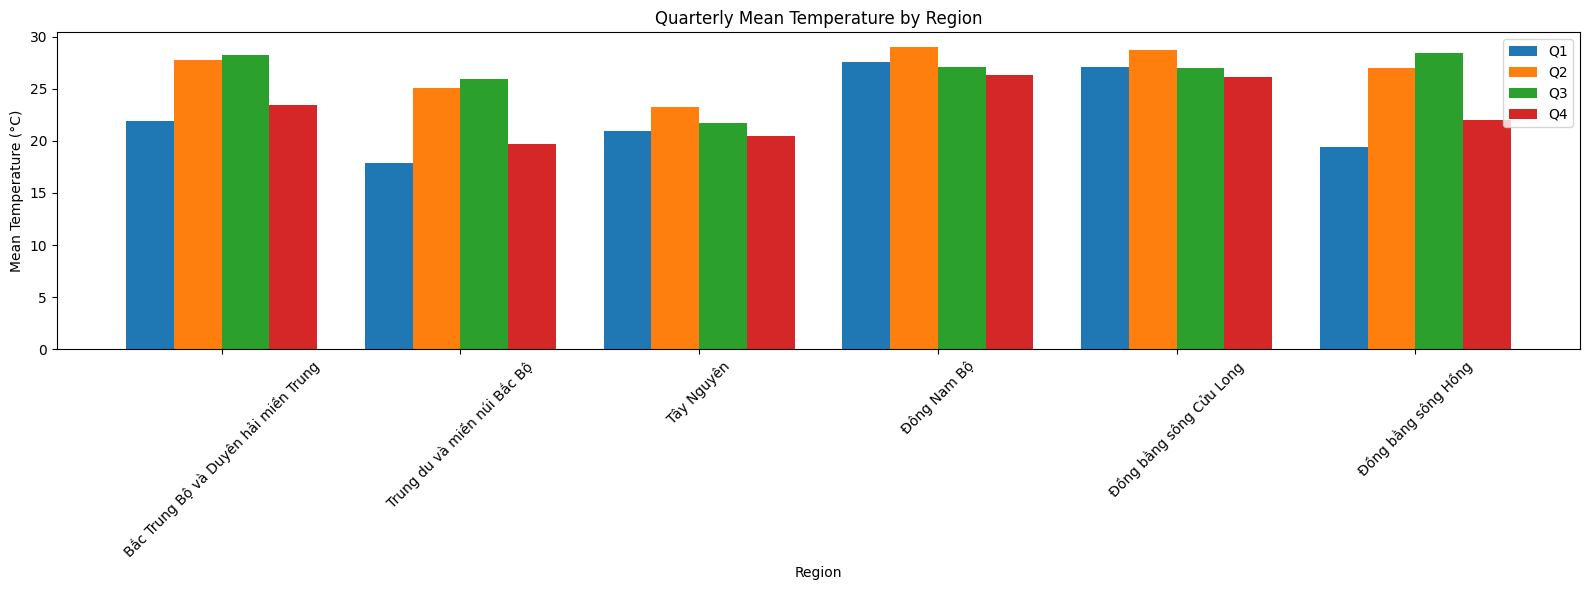

In [27]:
plt.figure(figsize=(16, 6))
temp_mean_agg = temp_mean.groupby(['region', 'quarter'], as_index=False).mean()

pivot_temp_mean = temp_mean_agg.pivot(index='region', columns='quarter', values='mean_temp').fillna(0)

x = range(len(pivot_temp_mean))

bar_width = 0.2
x = np.arange(len(pivot_temp_mean))

plt.bar(x - 1.5 * bar_width, pivot_temp_mean[1], width=bar_width, label='Q1')
plt.bar(x - 0.5 * bar_width, pivot_temp_mean[2], width=bar_width, label='Q2')
plt.bar(x + 0.5 * bar_width, pivot_temp_mean[3], width=bar_width, label='Q3')
plt.bar(x + 1.5 * bar_width, pivot_temp_mean[4], width=bar_width, label='Q4')

plt.xticks(x, pivot_temp_mean.index, rotation=45)
plt.title('Quarterly Mean Temperature by Region')
plt.xlabel('Region')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
temp_quarter_ranking = temp_mean_agg.groupby('quarter').agg(
  mean_temp=('mean_temp', 'mean'),
).rank(ascending=False).reset_index().sort_values(by='quarter', ascending=True)

In [29]:
temp_quarter_ranking

,quarter,mean_temp
0,1,4.0
1,2,1.0
2,3,2.0
3,4,3.0


In [30]:
df_ranking = df_ranking.merge(
    temp_quarter_ranking[['quarter', 'mean_temp']].rename(columns={'mean_temp': 'highest_1st_temp_quarter'}),
    on='quarter',
    how='left'
)


In [31]:
temp_region_ranking = temp_mean_agg.groupby('region').agg(
  mean_temp=('mean_temp', 'mean'),
).rank(ascending=False).reset_index()

In [32]:
temp_region_ranking

,region,mean_temp
0,Bắc Trung Bộ và Duyên hải miền Trung,3.0
1,Trung du và miền núi Bắc Bộ,5.0
2,Tây Nguyên,6.0
3,Đông Nam Bộ,1.0
4,Đồng bằng sông Cửu Long,2.0
5,Đồng bằng sông Hồng,4.0


In [33]:
df_ranking = df_ranking.merge(
    temp_region_ranking[['region', 'mean_temp']].rename(columns={'mean_temp': 'highest_1st_temp_region'}),
    on='region',
    how='left'
)


## Độ ẩm biến động ra sao giữa các địa hình?

In [34]:
ven_bien_df = df_v2[df_v2['terrain'] == 'ven biển']
dong_bang_df = df_v2[df_v2['terrain'] == 'đồng bằng']
mien_nui_df = df_v2[df_v2['terrain'] == 'miền núi']

ven_bien_by = ven_bien_df.groupby('date')['avghumidity'].mean().reset_index(name='mean_humidity')
dong_bang_by = dong_bang_df.groupby('date')['avghumidity'].mean().reset_index(name='mean_humidity')
mien_nui_by = mien_nui_df.groupby('date')['avghumidity'].mean().reset_index(name='mean_humidity')

ven_bien_by['month'] = ven_bien_by['date'].dt.month
dong_bang_by['month'] = dong_bang_by['date'].dt.month
mien_nui_by['month'] = mien_nui_by['date'].dt.month

In [35]:
month_ven_bien_by = ven_bien_by.groupby('month').agg(
  max_avghumidity = ('mean_humidity', 'max'),
  min_avghumidity = ('mean_humidity', 'min'),
  avg_avghumidity = ('mean_humidity', 'mean'),  
).reset_index()

In [36]:
month_dong_bang_by = dong_bang_by.groupby('month').agg(
  max_avghumidity = ('mean_humidity', 'max'),
  min_avghumidity = ('mean_humidity', 'min'),
  avg_avghumidity = ('mean_humidity', 'mean'),  
).reset_index()

In [37]:
month_mien_nui_by = mien_nui_by.groupby('month').agg(
  max_avghumidity = ('mean_humidity', 'max'),
  min_avghumidity = ('mean_humidity', 'min'),
  avg_avghumidity = ('mean_humidity', 'mean'),  
).reset_index()

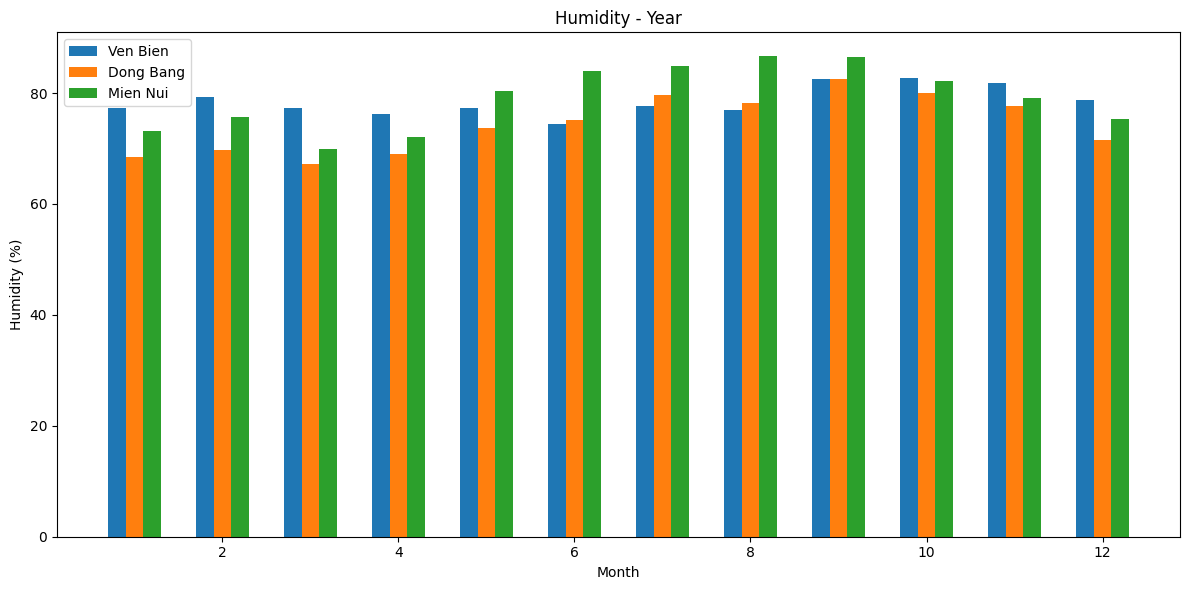

In [38]:
plt.figure(figsize=(12, 6))
width = 0.2
plt.bar(month_ven_bien_by['month'] - width, month_ven_bien_by['avg_avghumidity'], width=width, label='Ven Bien')
plt.bar(month_dong_bang_by['month'], month_dong_bang_by['avg_avghumidity'], width=width, label='Dong Bang')
plt.bar(month_mien_nui_by['month'] + width, month_mien_nui_by['avg_avghumidity'], width=width, label='Mien Nui')
plt.title('Humidity - Year')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
month_by = month_ven_bien_by.merge(
	month_mien_nui_by, on='month', suffixes=('_ven_bien', '_mien_nui')
).merge(
	month_dong_bang_by, on='month'
)

In [40]:
month_by['diff_mien_nui_dong_bang'] = month_by['avg_avghumidity_mien_nui'] - month_by['avg_avghumidity']
month_by['diff_ven_bien_dong_bang'] = month_by['avg_avghumidity_ven_bien'] - month_by['avg_avghumidity']

In [41]:
diff_mien_nui_dong_bang_mean = month_by['diff_mien_nui_dong_bang'].mean()
diff_ven_bien_dong_bang_mean = month_by['diff_ven_bien_dong_bang'].mean()

In [42]:
print(f"Mean difference between Mien Nui and Dong Bang: {diff_mien_nui_dong_bang_mean:.2f}")
print(f"Mean difference between Ven Bien and Dong Bang: {diff_ven_bien_dong_bang_mean:.2f}")

Mean difference between Mien Nui and Dong Bang: 4.75
Mean difference between Ven Bien and Dong Bang: 4.10


## Tần suất xảy ra mưa theo tháng ở các khu vực là bao nhiêu?

In [43]:
rain_df = df_v2[['name', 'date', 'totalprecip_mm']]
rain_df['rain'] = rain_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)
rain_df = rain_df.groupby(['name']).agg(
  rain = ('rain', 'mean'),
).reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_13408\1130328206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['rain'] = rain_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)


In [44]:
rain_df['rain'] = rain_df['rain'] * 100

In [45]:
rain_df[['name','rain']].sort_values(by='rain',ascending=False).head(10)

,name,rain
26,Hoi An,85.006196
7,Ca Mau,84.944238
52,Tuy Hoa,82.775713
41,Quy Nhon,82.775713
42,Rach Gia,82.713755
28,Lai Chau,82.280050
40,Quang Ngai,81.660471
10,Cao Lanh,81.040892
2,Bac Lieu,80.607187
43,Soc Trang,80.607187


In [46]:
rain_df[['name','rain']].sort_values(by='rain',ascending=True).head(10)

,name,rain
37,Phan Thiet,62.577447
27,Kon Tum,64.931846
39,Pleiku,64.931846
53,Tuyen Quang,65.613383
55,Viet Tri,65.613383
58,Vinh Yen,65.613383
60,Yen Bai,65.613383
25,Hoa Binh,66.047088
23,Hanoi,67.224287
44,Son La,67.534077


In [47]:
rain_name_df = df_v2[['name', 'date', 'month', 'totalprecip_mm']]
rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)
rain_name_df = rain_name_df.groupby(['name', 'month']).agg(
  rain = ('rain', 'mean'),
).reset_index()

rain_name_df_max = rain_name_df.groupby(['month']).agg(
  max_rain = ('rain', 'max'),
).reset_index()
rain_name_df_max = rain_name_df_max.merge(
    rain_name_df,
    how='left',
    left_on=['month', 'max_rain'],
    right_on=['month', 'rain']
)[['name', 'month', 'max_rain']]

rain_name_df_min = rain_name_df.groupby(['month']).agg(
  min_rain = ('rain', 'min'),
).reset_index()
rain_name_df_min = rain_name_df_min.merge(
    rain_name_df,
    how='left',
    left_on=['month', 'min_rain'],
    right_on=['month', 'rain']
)[['name', 'month', 'min_rain']]

C:\Users\asus\AppData\Local\Temp\ipykernel_13408\2765096863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)


In [48]:
rain_name_df_max['max_rain'] = rain_name_df_max['max_rain'] * 100
rain_name_df_min['min_rain'] = rain_name_df_min['min_rain'] * 100

In [49]:
rain_name_df_max.sort_values(by='month', ascending=True)

,name,month,max_rain
0,Quang Ngai,1,88.387097
1,Dong Hoi,2,86.524823
2,Lai Chau,3,76.774194
3,Ca Mau,4,86.000000
4,Bac Lieu,5,98.709677
5,Soc Trang,5,98.709677
6,Tay Ninh,5,98.709677
7,Ben Tre,6,100.000000
8,Can Tho,6,100.000000
9,Cao Lanh,6,100.000000


In [50]:
rain_name_df_min.sort_values(by='month', ascending=True)

,name,month,min_rain
0,Kon Tum,1,13.548387
1,Pleiku,1,13.548387
2,Phan Thiet,2,12.056738
3,Phan Thiet,3,18.064516
4,Quang Ngai,4,46.000000
5,Vinh,5,62.580645
6,Vinh,6,50.819672
7,Da Nang,7,72.580645
8,Ha Tinh,7,72.580645
9,Da Nang,8,71.774194


In [51]:
rain_name_df = df_v2[['name', 'date', 'month', 'totalprecip_mm']]
rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)
rain_name_df = rain_name_df.groupby(['name', 'month']).agg(
  rain = ('rain', 'mean'),
).reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_13408\3383904259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_name_df['rain'] = rain_name_df['totalprecip_mm'].apply(lambda x: 1 if x > 0 else 0)


In [52]:
rain_name_df['rain_ranking'] = rain_name_df['rain'].rank(ascending=True, method='dense')

In [53]:
rain_name_df.sort_values(by='rain_ranking', ascending=True)

,name,month,rain,rain_ranking
445,Phan Thiet,2,0.120567,1.0
324,Kon Tum,1,0.135484,2.0
468,Pleiku,1,0.135484,2.0
444,Phan Thiet,1,0.167742,3.0
709,Vung Tau,2,0.177305,4.0
...,...,...,...,...
653,Vi Thanh,6,1.000000,254.0
197,Dong Xoai,6,1.000000,254.0
56,Ben Tre,9,1.000000,254.0
53,Ben Tre,6,1.000000,254.0


In [54]:
df_ranking = df_ranking.merge(
    rain_name_df[['name', 'month', 'rain_ranking']].rename(columns={'rain_ranking': 'lowest_1st_rain_frequency_month_name'}),
    on=['name', 'month'],
    how='left'
)

## Có mối quan hệ nào giữa các yếu tố không?

In [55]:
df_v3 = df_v2.copy()

In [56]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in ['name', 'province', 'region', 'terrain']:
    df_v3[col] = label_enc.fit_transform(df_v3[col].astype(str))


In [57]:
corr_matrix = df_v3.corr(numeric_only=True)

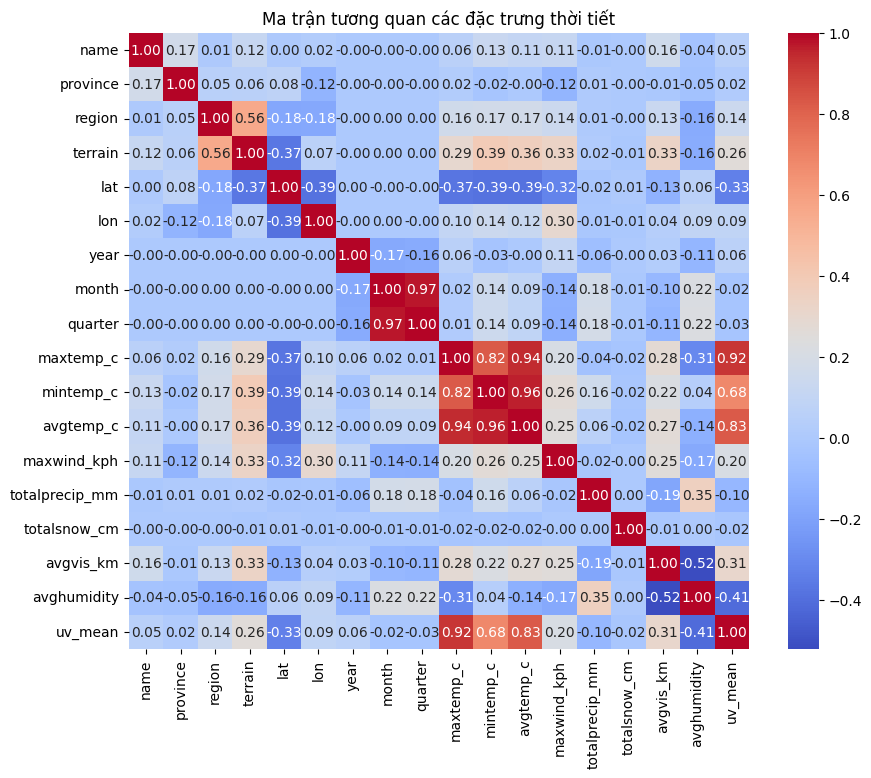

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan các đặc trưng thời tiết")
plt.show()


<Figure size 1200x600 with 0 Axes>

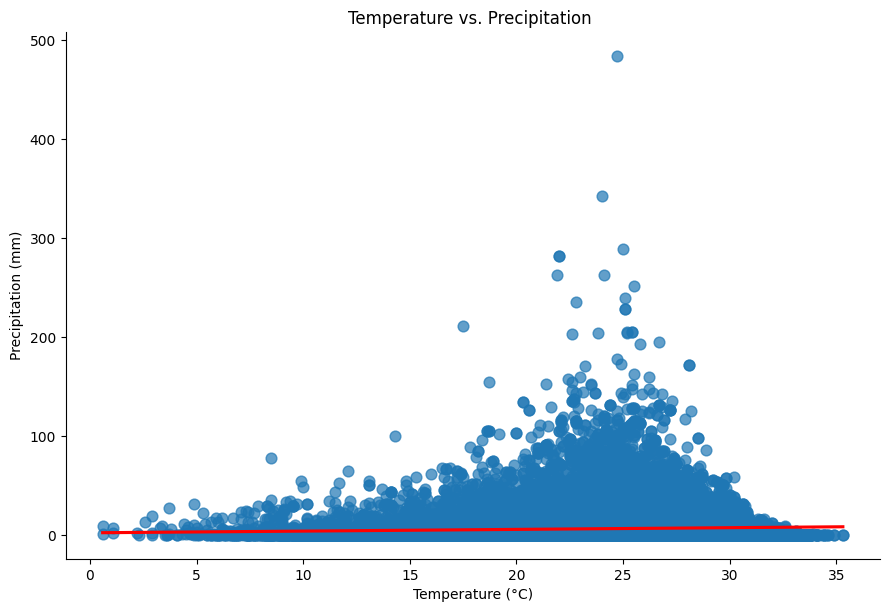

In [61]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='avgtemp_c',
    y='totalprecip_mm',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Temperature vs. Precipitation ')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()

<Figure size 1200x600 with 0 Axes>

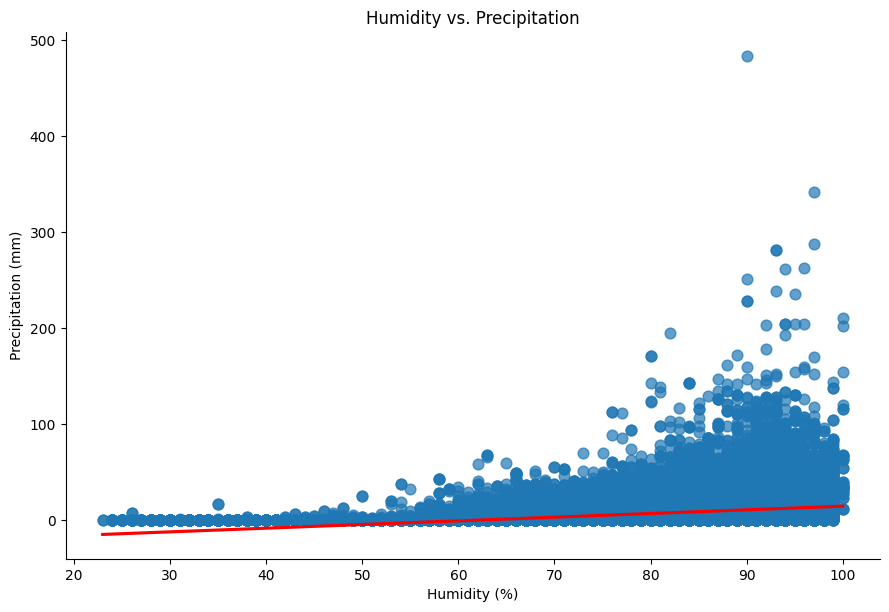

In [62]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='avghumidity',
    y='totalprecip_mm',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Humidity vs. Precipitation')
plt.xlabel('Humidity (%)')
plt.ylabel('Precipitation (mm)')
plt.show()

Humidity vs. Precipitation tỉ lệ thuận

<Figure size 1200x600 with 0 Axes>

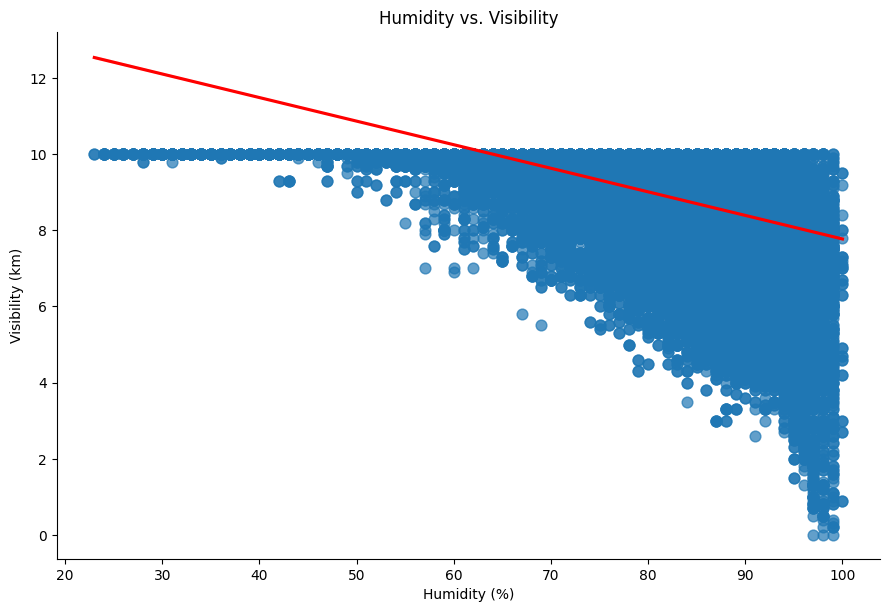

In [63]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='avghumidity',
    y='avgvis_km',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Humidity vs. Visibility')
plt.xlabel('Humidity (%)')
plt.ylabel('Visibility (km)')
plt.show()

Humidity vs. Visibility tỉ lệ nghịch

<Figure size 1200x600 with 0 Axes>

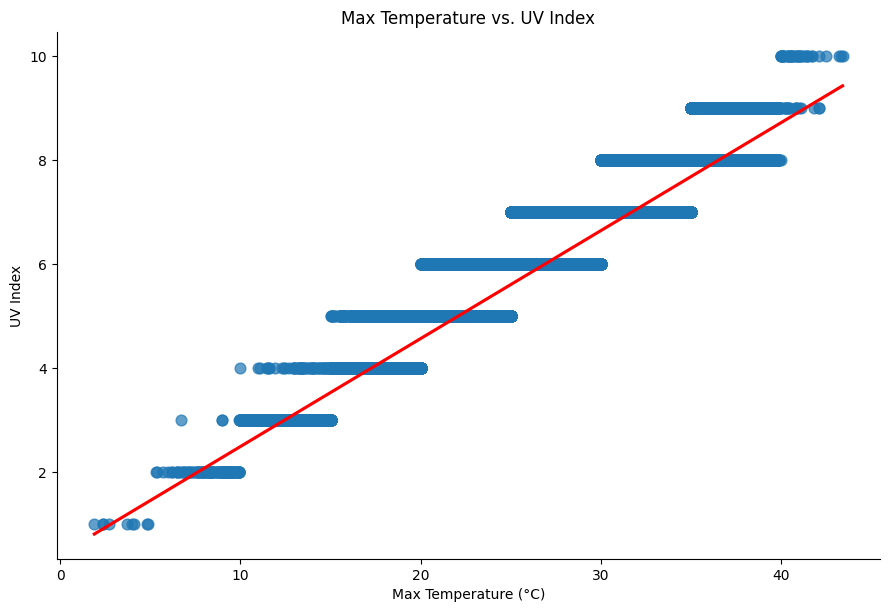

In [64]:
plt.figure(figsize=(12, 6))
sns.lmplot(
    data=df_v2,
    x='maxtemp_c',
    y='uv_mean',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title('Max Temperature vs. UV Index')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('UV Index')
plt.show()

Max Temperature vs. UV Index tỉ lệ thuận

## Có bất kỳ giá trị ngoại lai nào trong dữ liệu lượng mưa, nhiệt độ, độ ẩm không?

In [65]:
def detect_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return outliers

precip_outliers = detect_outliers_iqr(df_v2, 'totalprecip_mm')

temp_outliers = detect_outliers_iqr(df_v2, 'avgtemp_c')

humidity_outliers = detect_outliers_iqr(df_v2, 'avghumidity')

print(f"Number of precipitation outliers: {len(precip_outliers)}")
print(f"Number of temperature outliers: {len(temp_outliers)}")
print(f"Number of humidity outliers: {len(humidity_outliers)}")

Number of precipitation outliers: 8647
Number of temperature outliers: 1794
Number of humidity outliers: 1593


## Những địa phương nào có thời tiết ổn định nhất (nhiệt độ, mưa, gió ít biến động)?

In [66]:
temp_diff_by_day = df_v2[['name','date','avgtemp_c']].sort_values(by=['name', 'date'])
temp_diff_by_day['temp_diff'] = df_v2.groupby('name')['avgtemp_c'].diff()
temp_diff_by_day['temp_diff'] = abs(temp_diff_by_day['temp_diff'])
temp_diff_by_day = temp_diff_by_day.groupby('name').agg(
  max_temp_diff = ('temp_diff', 'max'),
  avg_temp_diff = ('temp_diff', 'mean'),
).reset_index()

In [67]:
temp_diff_by_day.sort_values(by='max_temp_diff', ascending=True)[['name','max_temp_diff']].head(5)

,name,max_temp_diff
59,Vung Tau,2.2
16,Dong Xoai,3.0
41,Quy Nhon,3.0
4,Ben Tre,3.5
24,Ho Chi Minh City,3.8


In [68]:
temp_diff_by_day['max_temp_diff_ranking'] = temp_diff_by_day['max_temp_diff'].rank(ascending=True, method='dense')

In [69]:
temp_diff_by_day[['name','max_temp_diff_ranking']].sort_values('max_temp_diff_ranking').head(5)

,name,max_temp_diff_ranking
59,Vung Tau,1.0
16,Dong Xoai,2.0
41,Quy Nhon,2.0
4,Ben Tre,3.0
24,Ho Chi Minh City,4.0


In [70]:
df_ranking = df_ranking.merge(
    temp_diff_by_day[['name', 'max_temp_diff_ranking']].rename(columns={'max_temp_diff_ranking': 'lowest_1st_maxdiff_temp_name'}),
    on='name',
    how='left'
)

In [71]:
temp_diff_by_day.sort_values(by='avg_temp_diff')[['name','avg_temp_diff']].head(5)

,name,avg_temp_diff
59,Vung Tau,0.374644
36,Phan Rang- Thap Cham,0.389833
37,Phan Thiet,0.421017
34,Nha Trang,0.441352
42,Rach Gia,0.454185


In [72]:
temp_diff_by_day['mean_temp_diff_ranking'] = temp_diff_by_day['avg_temp_diff'].rank(ascending=True, method='dense')

In [73]:
temp_diff_by_day[['name','mean_temp_diff_ranking']].sort_values('mean_temp_diff_ranking').head(5)

,name,mean_temp_diff_ranking
59,Vung Tau,1.0
36,Phan Rang- Thap Cham,2.0
37,Phan Thiet,3.0
34,Nha Trang,4.0
42,Rach Gia,5.0


In [74]:
df_ranking = df_ranking.merge(
    temp_diff_by_day[['name', 'mean_temp_diff_ranking']].rename(columns={'mean_temp_diff_ranking': 'lowest_1st_avgdiff_temp_name'}),
    on='name',
    how='left'
)

In [75]:
wind_diff_by_day = df_v2[['name','date','maxwind_kph']].sort_values(by=['name', 'date'])
wind_diff_by_day['wind_diff'] = df_v2.groupby('name')['maxwind_kph'].diff()
wind_diff_by_day['wind_diff'] = abs(wind_diff_by_day['wind_diff'])
wind_diff_by_day = wind_diff_by_day.groupby('name').agg(
  max_wind_diff = ('wind_diff', 'max'),
  min_wind_diff = ('wind_diff', 'min'),
  avg_wind_diff = ('wind_diff', 'mean'),
).reset_index()

In [76]:
wind_diff_by_day.sort_values(by='max_wind_diff', ascending=True)[['name','max_wind_diff']].head(5)

,name,max_wind_diff
13,Dien Bien Phu,8.3
44,Son La,8.3
30,Lao Cai,10.2
4,Ben Tre,10.8
32,My Tho,10.8


In [77]:
wind_diff_by_day['max_wind_diff_ranking'] = wind_diff_by_day['max_wind_diff'].rank(ascending=True, method='dense')


In [78]:
wind_diff_by_day[['name','max_wind_diff_ranking']].sort_values('max_wind_diff_ranking').head(5)

,name,max_wind_diff_ranking
13,Dien Bien Phu,1.0
44,Son La,1.0
30,Lao Cai,2.0
4,Ben Tre,3.0
32,My Tho,3.0


In [79]:
df_ranking = df_ranking.merge(
    wind_diff_by_day[['name', 'max_wind_diff_ranking']].rename(columns={'max_wind_diff_ranking': 'lowest_1st_maxdiff_wind_name'}),
    on='name',
    how='left'
)

In [80]:
wind_diff_by_day.sort_values(by='avg_wind_diff', ascending=True)[['name','avg_wind_diff']].head(5)

,name,avg_wind_diff
28,Lai Chau,1.348605
44,Son La,1.405456
13,Dien Bien Phu,1.412089
30,Lao Cai,1.451953
4,Ben Tre,2.171916


In [81]:
wind_diff_by_day['mean_wind_diff_ranking'] = wind_diff_by_day['avg_wind_diff'].rank(ascending=True, method='dense')


In [82]:
wind_diff_by_day[['name','mean_wind_diff_ranking']].sort_values('mean_wind_diff_ranking').head(5)

,name,mean_wind_diff_ranking
28,Lai Chau,1.0
44,Son La,2.0
13,Dien Bien Phu,3.0
30,Lao Cai,4.0
4,Ben Tre,5.0


In [83]:
df_ranking = df_ranking.merge(
    wind_diff_by_day[['name', 'mean_wind_diff_ranking']].rename(columns={'mean_wind_diff_ranking': 'lowest_1st_avgdiff_wind_name'}),
    on='name',
    how='left'
)

## Tại mỗi địa phương, tháng nào có trời nhiều nắng (tốt cho du lịch)?

In [84]:
dp_day = df_v2[['name', 'date', 'month', 'sunset', 'sunrise']].copy()

dp_day['time_sun'] = (dp_day['sunset'] - dp_day['sunrise']).dt.total_seconds() / 3600

dp_day_by = dp_day.groupby(['name', 'month']).agg(
    avg_time_sun=('time_sun', 'mean')
).reset_index()


In [85]:
dp_day_sort = dp_day_by.sort_values(by='avg_time_sun', ascending=False)


In [86]:
dp_day_sort['time_sun_ranking'] = dp_day_sort['avg_time_sun'].rank(ascending=False, method='dense')

In [87]:
dp_day_sort.head(5)

,name,month,avg_time_sun,time_sun_ranking
221,Ha Giang,6,13.507240,1.0
113,Cao Bang,6,13.494399,2.0
365,Lao Cai,6,13.483880,3.0
17,Bac Kan,6,13.458197,4.0
341,Lai Chau,6,13.455191,5.0


In [88]:
df_ranking = df_ranking.merge(
    dp_day_sort[['name', 'month', 'time_sun_ranking']].rename(columns={'time_sun_ranking': 'highest_1st_time_sun_month_name'}),
    on=['name', 'month'],
    how='left'
)

## Địa phương nào có thời tiết phù hợp du lịch kéo dài nhất trong năm?

In [89]:
df_day_label = df_v2[['name', 'terrain','date', 'month', 'avgtemp_c', 'maxwind_kph', 'avghumidity', 'avgvis_km']].copy()
def convent_temp(temp, terrain):
  if terrain == 'ven biển':
    if 25 <= temp < 30:
      return 0.58
    elif 30 <= temp <35:
      return 0.25
    else:
      return 1 - 0.58 - 0.25
  elif terrain == 'đồng bằng':
    if 19 <= temp <= 26:
      return 0.82
    else:
      return 1 - 0.82
  elif terrain == 'miền núi':
    if 19 <= temp <= 22:
      return 0.44
    elif 15 <= temp < 19 or 22 < temp <= 26:
      return 0.84 - 0.44
    else:
      return 1 - 0.84
def convent_wind(wind, terrain):
  if terrain == 'ven biển':
    if wind < 1:
      return 0.07
    elif 1 <= wind <= 9:
      return 0.87
    elif 9 < wind <= 40:
      return 0.06
    else:
      return 1 - 0.07 - 0.87 - 0.06
  elif terrain == 'đồng bằng':
    if wind < 1:
      return 0.1
    elif 1 <= wind <= 9:
      return 0.78
    elif 9 < wind <= 40:
      return 0.12
    else:
      return 1 - 0.1 - 0.78 - 0.12
  elif terrain == 'miền núi':
    if wind < 1:
      return 0.18
    elif 1 <= wind <= 9:
      return 0.68
    elif 9 < wind <= 40:
      return 0.14
    else:
      return 1 - 0.18 - 0.68 - 0.14 
def convent_humidity(humidity, terrain):
  if terrain == 'ven biển':
    if 30 + diff_ven_bien_dong_bang_mean <= humidity <= 60 + diff_ven_bien_dong_bang_mean:
      return 0.96
    else:
      return 1 - 0.96
  elif terrain == 'đồng bằng':
    if 30 <= humidity <= 60:
      return 0.96
    else:
      return 1 - 0.96
  elif terrain == 'miền núi':
    if 30 + diff_mien_nui_dong_bang_mean <= humidity <= 60 + diff_mien_nui_dong_bang_mean:
      return 0.96
    else:
      return 1 - 0.96
def convent_vis(vis):
  if vis >= 1:
    return 0.96
  else:
    return 1 - 0.96
df_day_label['temp_label'] = df_day_label.apply(lambda x: convent_temp(x['avgtemp_c'], x['terrain']), axis=1)
df_day_label['wind_label'] = df_day_label.apply(lambda x: convent_wind(x['maxwind_kph'], x['terrain']), axis=1)
df_day_label['humidity_label'] = df_day_label.apply(lambda x: convent_humidity(x['avghumidity'], x['terrain']), axis=1)
df_day_label['vis_label'] = df_day_label['avgvis_km'].apply(convent_vis)

In [90]:
df_day_month = df_day_label.groupby(['name', 'month']).agg(
  avg_temp=('avgtemp_c', 'mean'),
  avg_wind=('maxwind_kph', 'mean'),
  avg_humidity=('avghumidity', 'mean'),
  avg_vis=('avgvis_km', 'mean'),
  avg_temp_label=('temp_label', 'mean'),
  avg_wind_label=('wind_label', 'mean'),
  avg_humidity_label=('humidity_label', 'mean'),
  avg_vis_label=('vis_label', 'mean'),
).reset_index()
df_day_month['temp_rank'] = df_day_month['avg_temp_label'].rank(ascending=False, method='dense')
df_day_month['wind_rank'] = df_day_month['avg_wind_label'].rank(ascending=False, method= 'dense')
df_day_month['humidity_rank'] = df_day_month['avg_humidity_label'].rank(ascending=False, method='dense')
df_day_month['vis_rank'] = df_day_month['avg_vis_label'].rank(ascending=False, method='dense')


In [91]:
df_day_month.head(5)

,name,month,avg_temp,avg_wind,avg_humidity,avg_vis,avg_temp_label,avg_wind_label,avg_humidity_label,avg_vis_label,temp_rank,wind_rank,humidity_rank,vis_rank
0,Bac Giang,1,17.166452,15.337419,65.309677,9.774194,0.352774,0.206194,0.396129,0.96,275.0,154.0,27.0,2.0
1,Bac Giang,2,18.537589,15.652482,74.000000,9.487943,0.372199,0.201277,0.216170,0.96,250.0,157.0,86.0,2.0
2,Bac Giang,3,21.940000,18.427097,74.503226,9.512258,0.386323,0.150452,0.218065,0.96,232.0,216.0,83.0,2.0
3,Bac Giang,4,25.004667,19.086667,76.506667,9.576667,0.306667,0.158000,0.156533,0.96,324.0,206.0,108.0,1.0
4,Bac Giang,5,27.074839,17.974839,78.045161,9.487097,0.229419,0.146968,0.087484,0.96,382.0,221.0,147.0,2.0


In [92]:
df_ranking = df_ranking.merge(
    df_day_month[['name', 'month', 'temp_rank', 'wind_rank','humidity_rank', 'vis_rank']].rename(columns={'temp_rank': 'highest_1st_avgtourism_temp_month_name', 'wind_rank': 'highest_1st_avgtourism_wind_month_name', 'humidity_rank': 'highest_1st_avgtourism_humidity_month_name', 'vis_rank': 'highest_1st_avgtourism_vis_month_name'}),
    on=['name', 'month'],
    how='left'
)

In [93]:
update_feature = df_ranking.columns.drop(['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter'])

In [94]:
for feature in update_feature:
    df_ranking[feature] = df_ranking[feature].max() + 1 - df_ranking[feature]

In [95]:
df_ranking.columns

Index(['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year',
       'month', 'quarter', 'highest_1st_temp_quarter',
       'highest_1st_temp_region', 'lowest_1st_rain_frequency_month_name',
       'lowest_1st_maxdiff_temp_name', 'lowest_1st_avgdiff_temp_name',
       'lowest_1st_maxdiff_wind_name', 'lowest_1st_avgdiff_wind_name',
       'highest_1st_time_sun_month_name',
       'highest_1st_avgtourism_temp_month_name',
       'highest_1st_avgtourism_wind_month_name',
       'highest_1st_avgtourism_humidity_month_name',
       'highest_1st_avgtourism_vis_month_name'],
      dtype='object')

In [96]:
features = df_ranking.columns.drop(['name', 'province', 'region', 'terrain', 'lat', 'lon', 'date', 'year', 'month', 'quarter'])

In [97]:
df_features = df_ranking.groupby(['name', 'province', 'region', 'terrain', 'lat', 'lon', 'month', 'quarter']).mean(numeric_only=True).reset_index()

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_features[features] = scaler.fit_transform(df_features[features])

In [99]:
def weight(col, terrain):
  if 'custom' in col:
      return 7
  if 'temp' in col:
    if terrain == 'ven biển':
      if 'tourism' in col:
        return 6.11    
      if 'avgdiff' in col:
        return 5.11
      return 4.11
    elif terrain == 'đồng bằng':
      if 'tourism' in col:
        return 5.98
      if 'avgdiff' in col:
        return 4.98
      return 3.98
    elif terrain == 'miền núi':
      if 'tourism' in col:
        return 5.84
      if 'avgdiff' in col:
        return 4.84
      return 3.84
  elif 'wind' in col:
    if terrain == 'ven biển':
      if 'tourism' in col:
        return 5.13
      return 4.13
    elif terrain == 'đồng bằng':
      if 'tourism' in col:
        return 4.75
      return 3.75
    elif terrain == 'miền núi':
      if 'tourism' in col:
        return 5.41
      return 4.41
  elif 'rain' in col:
    if terrain == 'ven biển':
      return 5.87
    elif terrain == 'đồng bằng':
      return 5.77
    elif terrain == 'miền núi':
      return 6.04
  elif 'time_sun' in col:
    if terrain == 'ven biển':
      return 6.14
    elif terrain == 'đồng bằng':
      return 5.14
    elif terrain == 'miền núi':
      return 5.55
  elif 'humidity' in col:
    return 3.5
  elif 'vis' in col:
    return 3.5

In [100]:
for col in features:
    df_features[col] = df_features.apply(lambda x: x[col] * weight(col, x['terrain']), axis=1)


In [101]:
df_features['score'] = df_features[features].sum(axis=1)

In [102]:
df_features[['name', 'month', 'score']].sort_values(by='score', ascending=False)

,name,month,score
51,Ben Tre,4,40.319521
387,My Tho,4,39.693631
53,Ben Tre,6,39.292393
50,Ben Tre,3,38.809925
389,My Tho,6,38.683441
...,...,...,...
191,Dong Hoi,12,13.779946
181,Dong Hoi,2,12.860562
180,Dong Hoi,1,12.553773
565,Thai Binh,2,12.540718


run function

In [103]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [104]:
wsse_list = []
silhouette_scores=[]
davies_bouldin_scores = []
K_list = range(6, 15)
df_cluster = df_features[features]
for k in K_list:
    np.random.seed(42)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=1000)

    kmeans.fit(df_cluster)

    wsse_list.append(kmeans.inertia_)

    silhouette_scores.append(silhouette_score(df_cluster, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df_cluster, kmeans.labels_))

Text(0.5, 1.0, 'Elbow curve')

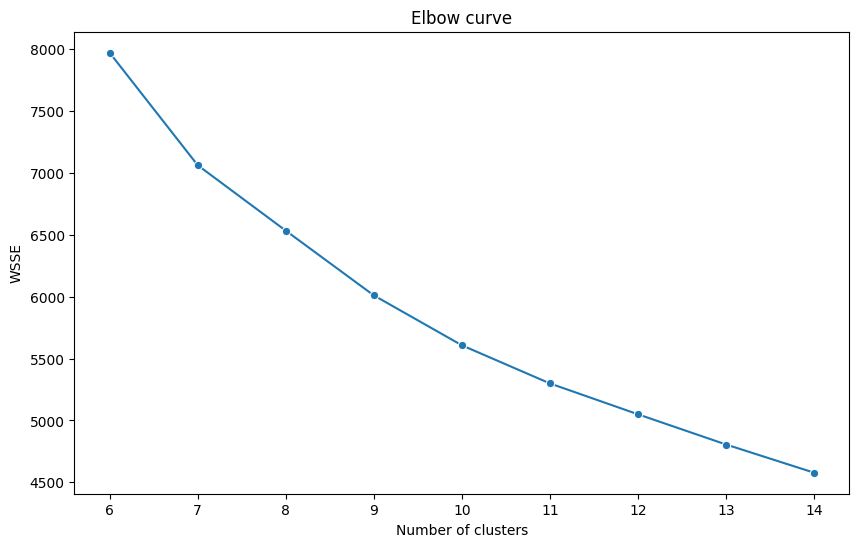

In [105]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=K_list, y=wsse_list, marker='o')
plt.xticks(K_list)
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.title('Elbow curve')

Text(0.5, 1.0, 'Silhouette Score')

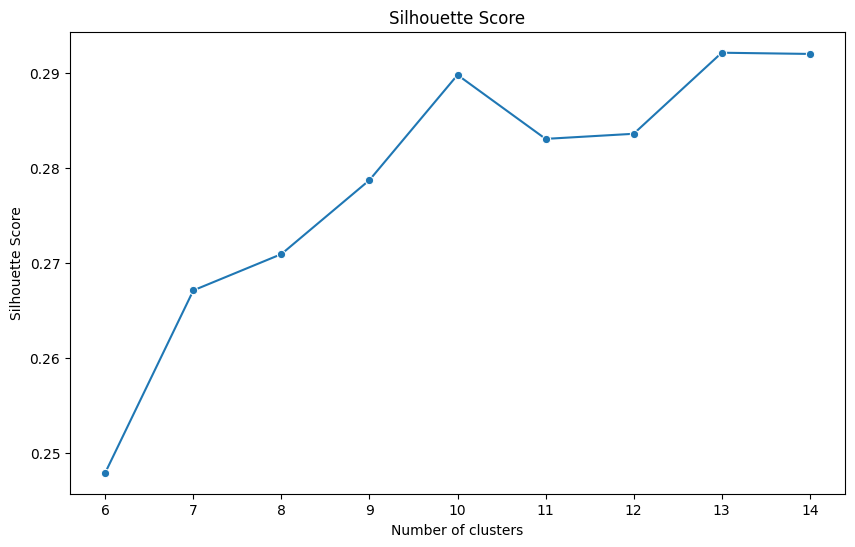

In [106]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=K_list, y=silhouette_scores, marker='o')
plt.xticks(K_list)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

Text(0.5, 1.0, 'Davies-Bouldin Score')

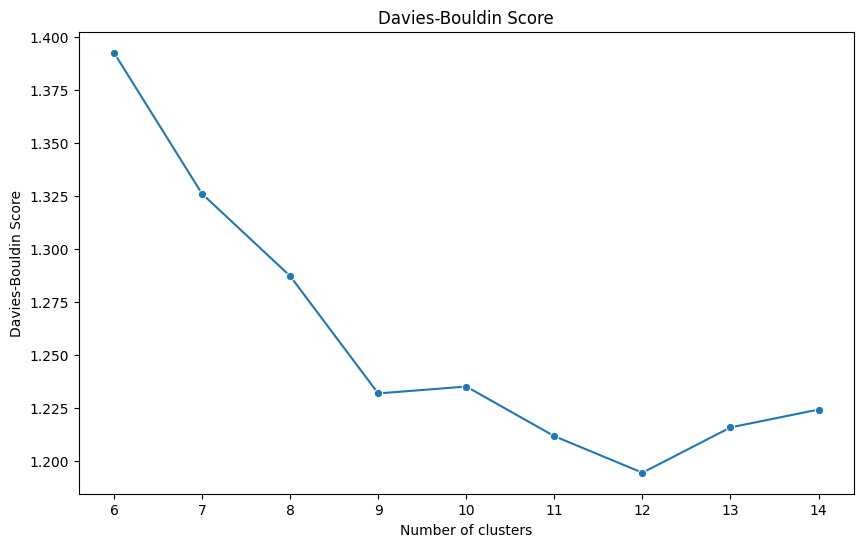

In [107]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=K_list, y=davies_bouldin_scores, marker='o')
plt.xticks(K_list)
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

n = 10

In [108]:
k_means_score = []
for k in K_list:
  if k == 10:
    k_means_score.extend([wsse_list[k - K_list[0]], silhouette_scores[k - K_list[0]], davies_bouldin_scores[k - K_list[0]]])
    break

In [109]:
len(df_cluster.columns)

12

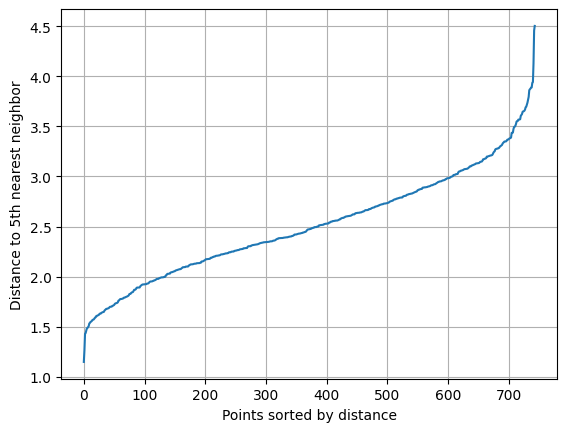

In [110]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=13)
neighbors_fit = neighbors.fit(df_cluster)
distances, indices = neighbors_fit.kneighbors(df_cluster)

distances = np.sort(distances[:, 12])
plt.plot(distances)
plt.ylabel("Distance to 5th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.grid()
plt.show()

eps ≈ 3.2

In [111]:
dbscan = DBSCAN(eps=3.2, min_samples=13)
dbscan.fit(df_cluster)

dbscan_silhouette = silhouette_score(df_cluster, dbscan.labels_)
dbscan_davies_bouldin = davies_bouldin_score(df_cluster, dbscan.labels_)

In [112]:
dbscan_score = []
dbscan_score.extend([None, dbscan_silhouette, dbscan_davies_bouldin])

In [113]:
agglo_silhouette_scores=[]
agglo_davies_bouldin_scores = []
agglo_list = range(6, 15)
df_cluster = df_features[features]
for agglo_ in agglo_list:
    agglo = AgglomerativeClustering(n_clusters=agglo_, metric='euclidean', linkage='ward')

    agglo.fit(df_cluster)

    agglo_silhouette_scores.append(silhouette_score(df_cluster, agglo.labels_))
    agglo_davies_bouldin_scores.append(davies_bouldin_score(df_cluster, agglo.labels_))

Text(0.5, 1.0, 'Silhouette Score')

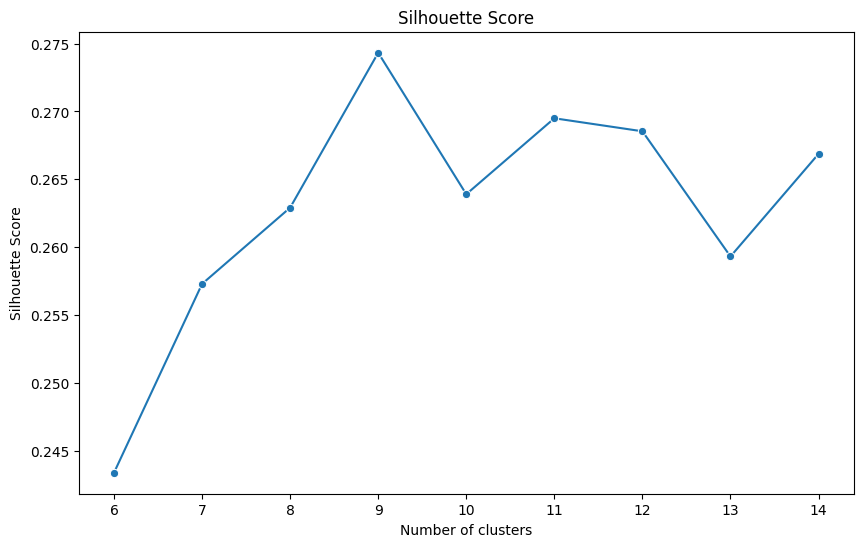

In [114]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=agglo_list, y=agglo_silhouette_scores, marker='o')
plt.xticks(agglo_list)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

Text(0.5, 1.0, 'Davies-Bouldin Score')

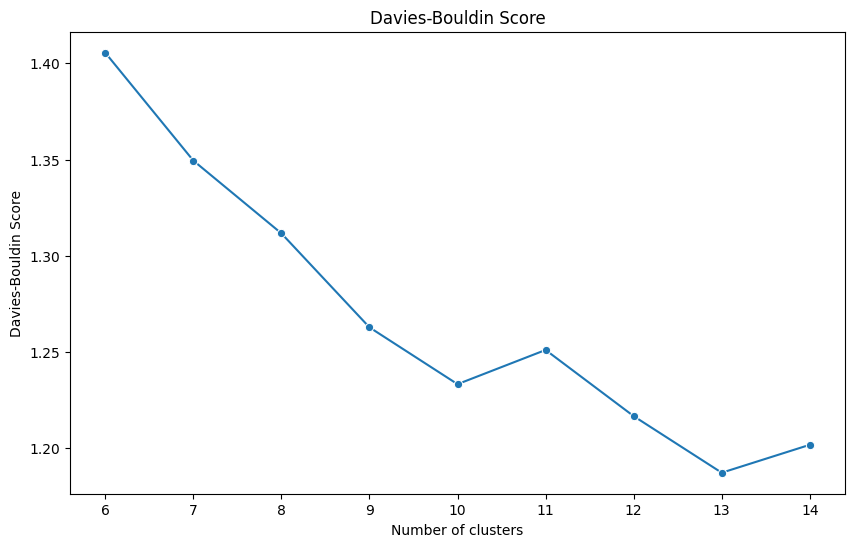

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=agglo_list, y=agglo_davies_bouldin_scores, marker='o')
plt.xticks(agglo_list)
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')

n = 9

In [116]:
agglo_score = []
for k in agglo_list:
  if k == 9:
    agglo_score.extend([None, silhouette_scores[k - agglo_list[0]], davies_bouldin_scores[k - agglo_list[0]]])
    break

In [117]:
print("Score: MSE, Silhouette Score, Davies-Bouldin Score")
print("K-Means:", k_means_score)
print("DBSCAN:", dbscan_score)
print("Agglomerative Clustering:", agglo_score)

Score: MSE, Silhouette Score, Davies-Bouldin Score
K-Means: [5606.97207608086, np.float64(0.2898191893828645), np.float64(1.2351748667764129)]
DBSCAN: [None, np.float64(-0.004096053603985232), np.float64(1.8034166100771936)]
Agglomerative Clustering: [None, np.float64(0.27875353088809524), np.float64(1.2319134000795233)]


chọn Kmean

In [129]:
df_features.head()

,name,province,region,terrain,lat,lon,month,quarter,year,highest_1st_temp_quarter,...,lowest_1st_maxdiff_temp_name,lowest_1st_avgdiff_temp_name,lowest_1st_maxdiff_wind_name,lowest_1st_avgdiff_wind_name,highest_1st_time_sun_month_name,highest_1st_avgtourism_temp_month_name,highest_1st_avgtourism_wind_month_name,highest_1st_avgtourism_humidity_month_name,highest_1st_avgtourism_vis_month_name,score
0,Bac Giang,Bắc Giang,Trung du và miền núi Bắc Bộ,miền núi,21.2667,106.2,1,1,2023.000000,0.00,...,2.048,0.558462,0.205116,0.0,0.298552,2.307638,2.878716,2.997238,3.15,20.225159
1,Bac Giang,Bắc Giang,Trung du và miền núi Bắc Bộ,miền núi,21.2667,106.2,2,1,2023.007092,0.00,...,2.048,0.558462,0.205116,0.0,0.918621,2.629934,2.829083,1.856354,3.15,18.114873
2,Bac Giang,Bắc Giang,Trung du và miền núi Bắc Bộ,miền núi,21.2667,106.2,3,1,2023.000000,0.00,...,2.048,0.558462,0.205116,0.0,2.434345,2.861987,1.852966,1.914365,3.15,18.729683
3,Bac Giang,Bắc Giang,Trung du và miền núi Bắc Bộ,miền núi,21.2667,106.2,4,2,2023.000000,3.84,...,2.048,0.558462,0.205116,0.0,3.973034,1.675938,2.018410,1.430939,3.50,22.357504
4,Bac Giang,Bắc Giang,Trung du và miền núi Bắc Bộ,miền núi,21.2667,106.2,5,2,2023.000000,3.84,...,2.048,0.558462,0.205116,0.0,5.014138,0.928212,1.770245,0.676796,3.15,20.391379


In [131]:
df_v2.head()

,name,province,region,terrain,lat,lon,date,year,month,quarter,...,mintemp_c,avgtemp_c,maxwind_kph,totalprecip_mm,totalsnow_cm,avgvis_km,avghumidity,uv_mean,sunrise,sunset
0,Long Xuyen,An Giang,Đồng bằng sông Cửu Long,đồng bằng,10.3833,105.4167,2021-01-01,2021,1,1,...,20.3,24.0,18.4,0.0,0.0,10.0,68,7,1900-01-01 06:16:00,1900-01-01 17:48:00
1,Long Xuyen,An Giang,Đồng bằng sông Cửu Long,đồng bằng,10.3833,105.4167,2021-01-02,2021,1,1,...,20.9,24.0,14.8,0.0,0.0,10.0,71,7,1900-01-01 06:16:00,1900-01-01 17:49:00
2,Long Xuyen,An Giang,Đồng bằng sông Cửu Long,đồng bằng,10.3833,105.4167,2021-01-03,2021,1,1,...,21.6,24.4,13.0,0.0,0.0,10.0,79,7,1900-01-01 06:17:00,1900-01-01 17:49:00
3,Long Xuyen,An Giang,Đồng bằng sông Cửu Long,đồng bằng,10.3833,105.4167,2021-01-04,2021,1,1,...,23.2,26.7,11.2,0.7,0.0,10.0,73,7,1900-01-01 06:17:00,1900-01-01 17:50:00
4,Long Xuyen,An Giang,Đồng bằng sông Cửu Long,đồng bằng,10.3833,105.4167,2021-01-05,2021,1,1,...,23.5,25.4,11.9,4.0,0.0,7.3,84,6,1900-01-01 06:17:00,1900-01-01 17:50:00


In [132]:
df_cluster = df_features.copy()

# Tính các giá trị trung bình cho các cột yêu cầu từ toàn bộ df_v2
agg_cols = ['avgtemp_c', 'maxwind_kph', 'avghumidity', 'avgvis_km']
agg_df = df_v2.groupby(['name','province', 'region', 'terrain', 'month'])[agg_cols].mean().reset_index()

# Merge vào df_cluster theo các trường tương ứng
df_cluster = df_cluster.merge(
    agg_df,
    on=['name', 'province', 'region', 'terrain', 'month'],
    how='left'
)

In [133]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Thêm n_init để tránh cảnh báo
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[features])

In [134]:
df_cluster[['name', 'month', 'cluster']].sort_values(by='cluster', ascending=True)

,name,month,cluster
0,Bac Giang,1,0
1,Bac Giang,2,0
2,Bac Giang,3,0
741,Yen Hung,10,0
697,Vinh Yen,2,0
...,...,...,...
224,Ha Giang,9,9
223,Ha Giang,8,9
222,Ha Giang,7,9
221,Ha Giang,6,9


đề xuất tốt nhất:
score cao nhất (nếu có yêu cầu tháng thì thêm điều kiện). hoặc dựa vào reference
và 4 điều địa điểm, tháng có điểm cao thấp hơn trong cùng cụm

In [135]:
df_cluster.to_csv('df_cluster.csv', index=False)